In [18]:
import h5py
import mesh
import fourier
import numpy as np
import matplotlib.pyplot as plt

In [33]:

file_path = "t4/output_00000/particles_eft_multigrid_ncoarse8.h5"


with h5py.File(file_path, "r") as hdf_file:
   
    position = hdf_file['position'][:]
    boxlen = hdf_file.attrs['boxlen']
    ncells_1d = 2**(hdf_file.attrs['ncoarse'])
    density = mesh.CIC(position, ncells_1d)

    print(hdf_file.attrs.items())

    



FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 't4/output_00000/particles_eft_multigrid_ncoarse8.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [29]:
density.shape

(256, 256, 256)

In [30]:
density_fourier = fourier.fft_3D_real(density,1)
k, Pk, Nmodes = fourier.fourier_grid_to_Pk(density_fourier, 2)
Pk *= (boxlen / len(density) ** 2) ** 3
k *= 2 * np.pi / boxlen

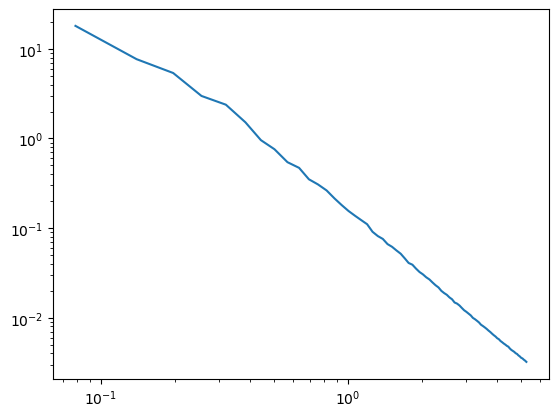

In [31]:
plt.loglog(k,Pk)